# Unit 5 - Financial Planning

In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
# Load .env enviroment variables
# load_dotenv()

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3 

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [13]:
# Fetch current BTC price
btc = requests.get(btc_url).json()
btc_price = btc['data']['1']['quotes']['USD']['price']

In [14]:
# Fetch current ETH price 
eth = requests.get(eth_url).json()
eth_price = eth['data']['1027']['quotes']['USD']['price']

In [15]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $46401.60
The current value of your 5.3 ETH is $14664.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [17]:
# Set Alpaca API key and secret
API_secret = '8adPTMJlZKgdR8WHxjC9HKRXdq53Vc8qEzDnqPkE'

# Create the Alpaca API object
API_key = 'PK8Z9FUVVPE9JO1ELUDK'

In [19]:
api = tradeapi.REST(API_key, 
                    API_secret, 
                    api_version="v2")

In [20]:
# Get daily price data for AAPL over the last 5 trading days.
barset = api.get_barset('AAPL', 'day', limit=5)
aapl_bars = barset['AAPL']

# See how much AAPL moved in that timeframe.
week_open = aapl_bars[0].o
week_close = aapl_bars[-1].c
percent_change = (week_close - week_open) / week_open * 100
print('AAPL moved {}% over the last 5 days'.format(percent_change))

AAPL moved -1.877199843566673% over the last 5 days


In [34]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-27", tz="America/New_York").isoformat()

In [35]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [36]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df = api.get_barset(
    tickers,
    timeframe,
    start = today,
    limit = 1000).df

In [37]:
# Preview DataFrame
df.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
2021-05-27 00:00:00-04:00  114.61  114.62  114.45  114.545  4826895  420.17   

                                                               
                             high       low   close    volume  
2021-05-27 00:00:00-04:00  420.72  418.9851  419.69  48411613

In [38]:
# Pick AGG and SPY close prices
AGG = df['AGG']["close"][0]
print(AGG)

SPY = df['SPY']["close"][0]
print(SPY)

114.545
419.69


In [42]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG}")
print(f"Current SPY closing price: ${SPY}")

Current AGG closing price: $114.545
Current SPY closing price: $419.69


In [43]:
# Compute the current value of shares
my_spy_value = my_spy * AGG
my_agg_value = my_agg * SPY

In [44]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}") 
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5727.25
The current value of your 200 AGG shares is $83938.00


### Savings Health Analysis

In [45]:
# Set monthly household income
monthly_income = 12000

In [46]:
# Consolidate financial assets data
# YOUR CODE HERE!

In [47]:
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

In [48]:
portfolio_list = [crypto, shares]

In [49]:
df_savings = pd.DataFrame(portfolio_list, columns = ["amount"],index=["crypto", 'shares'])

In [50]:
df_savings.head()

,amount
crypto,61066.17
shares,89665.25


In [51]:
# Create savings DataFrame
# Display savings DataFrame
display(df_savings)

,amount
crypto,61066.17
shares,89665.25


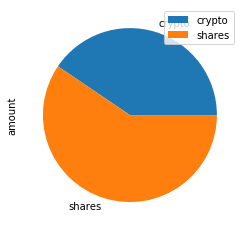

In [52]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [53]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()
print(total_savings, emergency_fund)

150731.41999999998 36000


In [54]:
# Validate saving health
if total_savings > emergency_fund:
    print('congratulations on meeting your goal')
elif total_savings == emergency_fund:
    print('Congratulations again')
else:
    print(f'you are {emergency_fund - total_savings} away from reaching your goal')

congratulations on meeting your goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [55]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [58]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
stock_data = api.get_barset(
tickers,
timeframe,
start=start_date,
end=end_date
).df

stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                              SPY                                        
                             open      high     low     close    volume  
2020-12-07 00:00:00-05:00  369.02  369.6200  367.72  369.1200  40456544  
2020-12-08 00:00:00-05:00  367.72  370.7800  367.67  370.1599  32702217  
2020-12-09 00:00:00-05:00  370.88  371.0500  365.95  366.8900  60700254  
2020-12-10 00:00:00-05:00  365.37  367.8600  364.43  366.7200  47851654  
2020-12-11 00:00:00-05:00  364.90  366.7402  363.26  366.2800  47917103

In [60]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyear = MCSimulation(
    portfolio_data = stock_data, 
    weights = [.40, .60], 
    num_simulation=500, 
    num_trading_days=252*30)

In [61]:
# Printing the simulation input data
MC_thirtyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                                           SPY                              \
                          daily_return    open      high     low     close   
2020-12-07 00:00:00-05:00          NaN  369.02  369.6200  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.7800  367.67  370.1599   
2020-12-09 00:00:00-05:00    -0.001274  370.88  371.0500  365.95  366.8900   
2020-12-10 00:00:00-05:00     0.002211  365.37  367.8600  364.43  366.7200   
2020-12-11 00:00:00-05:00     0.001272  364.90  366.7402  363.26  366.2800   

                                                  
                             volume daily_return  
2020-12-07 00:00:00-05:00  40456544          NaN  
2020-12-08 00:00:00-05:00  32702217     0.002817  
2020-12-09 00:00:00-05:00  60700254    -0.008834  
2020-12-10 00:00:00-05:00  47851654    -0.000463  
2020-12-11 00:00:00-05:00  47917103    -0.001200

In [63]:
MC_thirtyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996520,0.997590,0.997060,0.996305,0.998023,0.994350,0.996345,0.998744,1.001569,1.009758,...,0.993437,1.009357,1.005615,1.003151,1.001349,1.003498,0.999839,1.006642,1.004254,1.007520
2,0.992684,0.997986,0.992503,1.002011,1.007546,0.998032,1.003180,1.006119,1.005135,1.021193,...,0.995723,1.003606,1.007635,1.006062,1.007339,1.007235,0.993292,1.006294,1.001789,1.014185
3,0.994530,0.996756,0.999123,0.997541,1.012931,0.999584,1.003949,1.001248,1.007383,1.024843,...,1.000309,1.008470,1.009882,1.008933,1.005609,0.994438,0.991926,0.996279,1.002468,1.011800
4,0.991602,0.991290,0.995701,0.998204,1.012246,0.994681,0.998895,1.004335,1.010299,1.033615,...,0.999887,1.015581,1.006946,1.013891,1.011339,0.990734,0.993634,0.994822,1.003251,1.024635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,134.733946,161.768796,211.520013,85.896295,199.994735,90.003735,118.777547,115.686428,121.550825,157.820608,...,85.760499,139.217289,139.175524,186.081116,82.080893,114.876379,62.532949,109.343145,150.368198,92.973791
7557,134.857363,161.861882,211.577149,85.852947,200.207310,90.381228,118.137404,115.657890,122.330824,159.322996,...,85.305355,140.303652,139.573672,186.109844,82.439470,113.711289,62.049868,109.598395,148.750685,92.158946
7558,134.909146,162.581308,212.850972,85.319892,200.647162,90.333797,117.711128,116.051767,121.765391,158.155398,...,86.023251,140.340624,138.902611,186.751757,83.318464,114.109198,62.590064,109.006097,148.715345,92.308955
7559,134.777752,162.053120,213.800109,84.960168,201.949604,90.364784,117.529268,115.999910,120.131389,157.449586,...,86.224192,138.975982,138.386438,186.413389,82.583155,112.726559,62.453003,108.398008,149.471739,93.036953


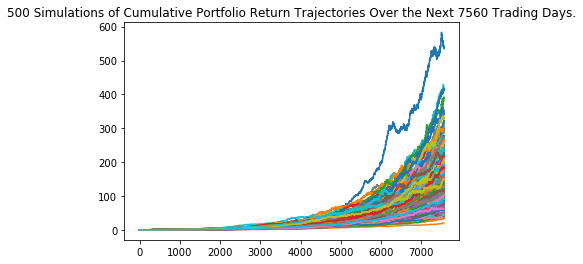

In [64]:
# Plot simulation outcomes
MC_thirtyear.plot_simulation()

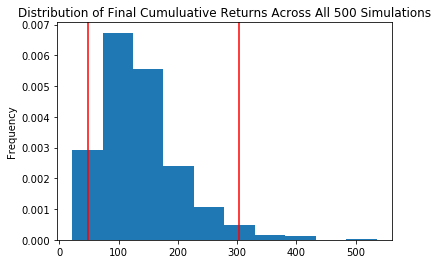

In [65]:
# Plot probability distribution and confidence intervals
MC_thirtyear.plot_distribution()

### Retirement Analysis

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
Summary_30_year = MC_thirtyear.summarize_cumulative_return()

# Print summary statistics
print(Summary_30_year)

count           500.000000
mean            136.721297
std              66.857002
min              21.442828
25%              89.696436
50%             124.589164
75%             165.283991
max             535.262070
95% CI Lower     47.683926
95% CI Upper    302.464793
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [68]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
CI_lower = round(Summary_30_year[8]*initial_investment,2)
CI_upper = round(Summary_30_year[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${CI_lower} and ${CI_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $953678.53 and $6049295.87


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [69]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
CI_lower = round(Summary_30_year[8]*initial_investment,2)
CI_upper = round(Summary_30_year[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${CI_lower} and ${CI_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1430517.79 and $9073943.8


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")